In [1]:
import fastai
from fastai.vision.all import *
import pandas as pd

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,balanced_accuracy_score
import numpy as np

In [3]:
sls = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/3200_sls.csv")

C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
sls.head()

,id,kdprov,kdkab,kdkec,kddesa,iddesa,idslsnon,nmslsnon,ketua_sls,jenis,...,j_bstt,j_bsbtt,j_bstt_k,j_bskeko,j_segmen,dom,ldom,j_m_all,j_m_30,klas_ur
0,263884,32,1,10,1,3201010001,100,RT 001 RW 001 DUSUN 1,MUHAMAD RAFLI HIDAYAT,1,...,39,1,2,4,1,1,1,51,51,2
1,263885,32,1,10,1,3201010001,200,RT 002 RW 001 DUSUN 1,NURMAN,1,...,60,2,0,7,1,1,1,62,61,2
2,263886,32,1,10,1,3201010001,300,RT 003 RW 001 DUSUN 1,SAENUDIN,1,...,50,2,0,6,1,1,1,58,57,2
3,263887,32,1,10,1,3201010001,400,RT 004 RW 001 DUSUN 1,AEP,1,...,27,1,0,1,1,1,1,31,31,2
4,263888,32,1,10,1,3201010001,500,RT 005 RW 001 DUSUN 1,JEJEN JAELANI,1,...,49,7,3,8,3,1,1,63,57,2


In [5]:
sls.iddesa.unique().shape

(5957,)

In [8]:
os.chdir('C:/Users/jwst2/Python/tesis/jpg/UR/11. Sentinel 10M SLS ES')
if os.path.isdir('urban') is False:
    os.makedirs('urban')
    os.makedirs('rural')

In [9]:
yourpath = "C:/Users/jwst2/Python/tesis/jpg/general sls sentinel 10m ES/"
from tqdm import tqdm
for root, dirs, files in tqdm(os.walk(yourpath, topdown=False)):
    for name in files:
        try :
            if(sls.klas_ur[sls.iddesa == int(name.replace(".jpg","")[:10])].iloc[0] == 1):
                shutil.copy(os.path.join(root, name), "C:/Users/jwst2/Python/tesis/jpg/UR/11. Sentinel 10M SLS ES/urban/"+name)
            elif(sls.klas_ur[sls.iddesa == int(name.replace(".jpg","")[:10])].iloc[0] == 2):
                shutil.copy(os.path.join(root, name), "C:/Users/jwst2/Python/tesis/jpg/UR/11. Sentinel 10M SLS ES/rural/"+name)
        except Exception:
            print(name)
            pass 

0it [00:00, ?it/s]

32070000002000.jpg
32080000002001.jpg
32080100006001.jpg
32170000006001.jpg


1it [07:24, 444.66s/it]


In [10]:
split = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/datasplit_ur_desa.csv")

In [11]:
split_test =split

In [12]:
split_test

,Unnamed: 0,iddesa
0,0,3207250012
1,1,3273111002
2,2,3205260016
3,3,3212030010
4,4,3208181004
...,...,...
590,590,3210070009
591,591,3209040007
592,592,3203051007
593,593,3208030017


os.chdir('C:/Users/jwst2/Python/tesis/jpg/UR/11. Sentinel 10M SLS ES')
if os.path.isdir('urban') is False:
    os.makedirs('urban')
    os.makedirs('rural')### Create test

In [13]:
os.chdir('C:/Users/jwst2/Python/tesis/jpg/UR/test sls 10m ES')
if os.path.isdir('urban') is False:
    os.makedirs('urban')
    os.makedirs('rural')

In [14]:
yourpath = "C:/Users/jwst2/Python/tesis/jpg/UR/11. Sentinel 10M SLS ES/rural"
from tqdm import tqdm
for root, dirs, files in tqdm(os.walk(yourpath, topdown=False)):
    for name in files:
        try :
            if(split_test.iddesa.astype(str).str.contains(name[:10]).sum() > 0):
                shutil.move(os.path.join(root, name), "C:/Users/jwst2/Python/tesis/jpg/UR/test sls 10m ES/rural/"+name)
        except Exception:
            print(name)
            pass 

1it [00:36, 36.95s/it]


In [15]:
yourpath = "C:/Users/jwst2/Python/tesis/jpg/UR/11. Sentinel 10M SLS ES/urban"
from tqdm import tqdm
for root, dirs, files in tqdm(os.walk(yourpath, topdown=False)):
    for name in files:
        try :
            if(split_test.iddesa.astype(str).str.contains(name[:10]).sum() > 0):
                shutil.move(os.path.join(root, name), "C:/Users/jwst2/Python/tesis/jpg/UR/test sls 10m ES/urban/"+name)
        except Exception:
            print(name)
            pass 

1it [02:04, 124.75s/it]


### Run Dataset

In [62]:
path = Path.cwd() / ("C:/Users/jwst2/Python/tesis/jpg/UR/11. Sentinel 10M SLS ES/")

In [63]:
Path.BASE_PATH = path
path.ls()

(#2) [Path('rural'),Path('urban')]

In [64]:
fname = (path/"rural").ls()[0]
fname

Path('rural/32010100010001.jpg')

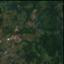

In [65]:
img = Image.open(fname)
img

In [66]:
blocks = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, # finds the images in the path
                 splitter=RandomSplitter(valid_pct=0.1, seed=42),  # default random split 80% training, 20% validation
                 get_y=parent_label) # data augmentation (mult multiplies the default transformation values)

In [67]:
dls = blocks.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


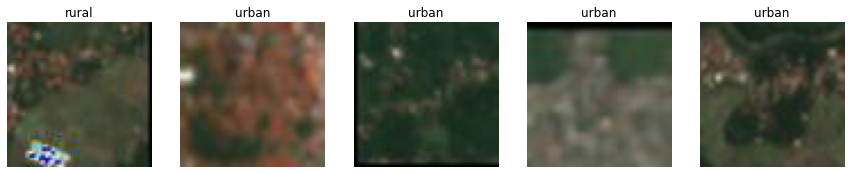

In [68]:
dls.show_batch(nrows=1, ncols=5)

In [69]:
avg = 'macro'
roca = RocAucBinary(average=avg)
f1s = F1Score(average=avg)
bc = BalancedAccuracy()
metrics=[accuracy,bc, Precision(average=avg), Recall(average=avg), f1s, roca]
learn = cnn_learner(dls, densenet121, metrics=metrics) 

C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\fastai\callback\schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.002511886414140463)

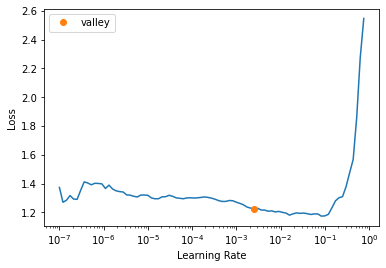

In [70]:
learn.lr_find()

In [71]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.365374,0.356263,0.829263,0.703862,0.744151,0.703862,0.719929,0.862659,09:32
1,0.358326,0.342179,0.836443,0.695540,0.762850,0.695540,0.718901,0.874592,09:33
2,0.344276,0.339526,0.838111,0.698015,0.766255,0.698015,0.721737,0.876865,09:32


In [72]:
learn.unfreeze()

In [73]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.391145,0.369466,0.829011,0.703259,0.743726,0.703259,0.719369,0.857025,11:56
1,0.353580,0.364929,0.825623,0.701116,0.737283,0.701116,0.715780,0.857937,11:44
2,0.355734,0.345369,0.834825,0.707380,0.755286,0.707380,0.725914,0.873524,11:39
3,0.336623,0.338259,0.838465,0.692739,0.769584,0.692739,0.718175,0.878546,11:41
4,0.336684,0.337618,0.839527,0.703435,0.767777,0.703435,0.726439,0.879126,11:37


In [74]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.365468,0.358094,0.832196,0.717781,0.748054,0.717781,0.730661,0.869031,11:36
1,0.357519,0.339857,0.836544,0.694540,0.763512,0.694540,0.718251,0.878556,11:45
2,0.341179,0.336904,0.838465,0.694957,0.768540,0.694957,0.719786,0.880605,11:38


In [75]:
dls.vocab

['rural', 'urban']

In [76]:
dls.train.items[175000]

Path('urban/32062300110017.jpg')

In [77]:
learn.export('C:/Users/jwst2/Python/tesis/models/18042022 D011.pkl')

In [78]:
 str(i)

'C:\\Users\\jwst2\\Python\\tesis\\jpg\\urbanrural\\11. Sentinel 10M SLS ES\\urban\\32041600100013.jpg'

### Up level

In [79]:
idx_train = []
for i in dls.train.items:
    idx_train.append(str(i)[-18:-4])
true_label = []
for i in dls.train.items:
    if("urban" in str(i)) :
        true_label.append(1)
    else :
        true_label.append(0)

In [80]:
preds,_ = learn.get_preds(ds_idx  = 0)
result_train = preds.numpy()
new_train = pd.DataFrame(result_train)

In [81]:
pd.value_counts(true_label)

1    140140
0     37877
dtype: int64

In [82]:
df = new_train
df["idsls"] = idx_train 
df["stat"] = round(df[1])
df["iddesa"] = df.idsls.str[:10]
df.head()

,0,1,idsls,stat,iddesa
0,0.163295,0.836705,32092200040011,1.0,3209220004
1,0.854493,0.145507,32180100020006,0.0,3218010002
2,0.002551,0.997449,32730900010054,1.0,3273090001
3,0.002204,0.997796,32013000110018,1.0,3201300011
4,0.451553,0.548447,32053100190020,1.0,3205310019


In [83]:
pd.value_counts(df.stat)

1.0    152465
0.0     25552
Name: stat, dtype: int64

In [84]:
df["true_lab"] = true_label

In [85]:
pd.value_counts(df.true_lab)

1    140140
0     37877
Name: true_lab, dtype: int64

In [86]:
accuracy_score(df.stat.apply(int),df.true_lab.apply(int))

0.8421892291185673

In [87]:
df.head()

,0,1,idsls,stat,iddesa,true_lab
0,0.163295,0.836705,32092200040011,1.0,3209220004,1
1,0.854493,0.145507,32180100020006,0.0,3218010002,0
2,0.002551,0.997449,32730900010054,1.0,3273090001,1
3,0.002204,0.997796,32013000110018,1.0,3201300011,1
4,0.451553,0.548447,32053100190020,1.0,3205310019,0


In [88]:
desa_pred = df.groupby('iddesa').agg({'stat': ['mean'], 'true_lab': 'mean'})

In [89]:
desa_pred.columns = ["pred","true"]

In [90]:
pd.value_counts(df.stat)

1.0    152465
0.0     25552
Name: stat, dtype: int64

In [91]:
for i in np.arange(0.1, 0.95, 0.05):
    value = round(i,2)
    desa_pred["label"+str(value)] = 0
    desa_pred["label"+str(value)][desa_pred.pred > value] = 1

C:\Users\jwst2\AppData\Local\Temp/ipykernel_4072/4109382162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desa_pred["label"+str(value)][desa_pred.pred > value] = 1


In [92]:
desa_pred.head()

,pred,true,label0.1,label0.15,label0.2,label0.25,label0.3,label0.35,label0.4,label0.45,label0.5,label0.55,label0.6,label0.65,label0.7,label0.75,label0.8,label0.85,label0.9
iddesa,,,,,,,,,,,,,,,,,,,
3201010001,0.111111,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3201010002,0.659574,0.0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0
3201010003,0.756098,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
3201010004,0.784314,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
3201010005,0.718750,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0


In [93]:
for j in range(2,19):
    print("result", desa_pred.columns[j])
    print("accuracy :",  accuracy_score( desa_pred.true,desa_pred.iloc[:,[j]]))
    print("precision :",  precision_score( desa_pred.true,desa_pred.iloc[:,[j]]))

result label0.1
accuracy : 0.7541961954494592
precision : 0.7472847168347556
result label0.15
accuracy : 0.7614696008951883
precision : 0.7546724375368876
result label0.2
accuracy : 0.7724729578515479
precision : 0.7642714570858283
result label0.25
accuracy : 0.7827303245057814
precision : 0.7737492404294106
result label0.3
accuracy : 0.7885117493472585
precision : 0.7805829228243021
result label0.35
accuracy : 0.7976501305483029
precision : 0.7901981230448384
result label0.4
accuracy : 0.8064155165982843
precision : 0.800679983000425
result label0.45
accuracy : 0.8110779559865722
precision : 0.8078499029544964
result label0.5
accuracy : 0.8181648638567699
precision : 0.8186825291914519
result label0.55
accuracy : 0.8224543080939948
precision : 0.8258828788556102
result label0.6
accuracy : 0.8274897426333457
precision : 0.8354228402097105
result label0.65
accuracy : 0.8321521820216338
precision : 0.8446353924756154
result label0.7
accuracy : 0.8353226408056695
precision : 0.85595039351

In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
pd.value_counts(desa_pred.true)

1.0    3868
0.0    1494
Name: true, dtype: int64

### Test result

In [100]:
path_pred = Path.cwd() / ("C:/Users/jwst2/Python/tesis/jpg/UR/test sls 10m ES")
test_files = [fn for fn in sorted((path_pred).glob('**/*')) if fn.is_file()]

In [101]:
len(test_files)

22041

In [102]:
test_dl = learn.dls.test_dl(test_files)

In [103]:
preds,_ = learn.get_preds(dl  =test_dl)

In [104]:
str(test_files[1])[-18:-4]

'32011500010002'

In [105]:
idx_test = []
for i in test_files:
    idx_test.append(str(i)[-18:-4])
true_label = []
for i in test_files:
    if("urban" in str(i)) :
        true_label.append(1)
    else :
        true_label.append(0)

In [106]:
test = pd.DataFrame(preds)

In [107]:
test["idsls"] = idx_test
test["true_lab"] = true_label

In [108]:
test["iddesa"] = test.idsls.str[:10]
test["stat"] = round(test[1])

In [109]:
test.head()

,0,1,idsls,true_lab,iddesa,stat
0,0.764419,0.235581,32011500010001,0,3201150001,0.0
1,0.812985,0.187015,32011500010002,0,3201150001,0.0
2,0.800111,0.199889,32011500010003,0,3201150001,0.0
3,0.788269,0.211731,32011500010004,0,3201150001,0.0
4,0.682551,0.317449,32011500010005,0,3201150001,0.0


In [110]:
desa_pred_test = test.groupby('iddesa').agg({'stat': ['mean'], 'true_lab': 'mean'})

In [111]:
desa_pred_test

,stat,true_lab
,mean,mean
iddesa,,
3201010010,0.971429,1.0
3201040001,1.000000,1.0
3201040005,1.000000,1.0
3201050012,1.000000,1.0
3201050013,1.000000,1.0
...,...,...
3278050003,1.000000,1.0
3278071005,1.000000,1.0


In [112]:
desa_pred_test.columns = ["pred","true"]

In [169]:
desa_pred_test["pred_lab"] = 0
desa_pred_test["pred_lab"][desa_pred_test.pred > 0.81] = 1

C:\Users\jwst2\AppData\Local\Temp/ipykernel_4072/3903990358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desa_pred_test["pred_lab"][desa_pred_test.pred > 0.81] = 1


In [170]:
desa_pred_test

,pred,true,pred_lab
iddesa,,,
3201010010,0.971429,1.0,1
3201040001,1.000000,1.0,1
3201040005,1.000000,1.0,1
3201050012,1.000000,1.0,1
3201050013,1.000000,1.0,1
...,...,...,...
3278050003,1.000000,1.0,1
3278071005,1.000000,1.0,1
3278080002,1.000000,1.0,1


In [171]:
print("accuracy :",  accuracy_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("balanced_accuracy_score :",  balanced_accuracy_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("precision :",  precision_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("recall :",  recall_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("f1 :",  f1_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("rocauc :",  roc_auc_score( desa_pred_test.true,desa_pred_test.pred_lab))

accuracy : 0.8504201680672269
balanced_accuracy_score : 0.8055230288836845
precision : 0.8858447488584474
recall : 0.9086651053864169
f1 : 0.8971098265895954
rocauc : 0.8055230288836847


In [156]:
accuracy : 0.8487394957983193
balanced_accuracy_score : 0.8007416081186574
precision : 0.8820861678004536
recall : 0.9110070257611241
f1 : 0.8963133640552996
rocauc : 0.8007416081186572

### Resnet

In [172]:
learn_rs = cnn_learner(dls, resnet50, metrics=metrics) 

In [173]:
learn_rs.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.379731,0.358749,0.830982,0.683394,0.753073,0.683394,0.706605,0.861907,07:21
1,0.361218,0.348492,0.834471,0.660407,0.777448,0.660407,0.689497,0.871567,07:22
2,0.339828,0.344957,0.835684,0.717415,0.754995,0.717415,0.732862,0.873867,07:20


In [174]:
learn_rs.unfreeze()

In [175]:
learn_rs.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.383621,0.375590,0.820163,0.602036,0.776735,0.602036,0.620649,0.860725,09:13
1,0.356597,0.360762,0.826584,0.729756,0.737908,0.729756,0.733657,0.865452,09:11
2,0.363970,0.346920,0.832600,0.693465,0.753864,0.693465,0.714979,0.870789,09:07
3,0.357632,0.341392,0.836645,0.699660,0.761846,0.699660,0.721927,0.875899,09:08
4,0.351612,0.339818,0.837707,0.701041,0.764029,0.701041,0.723582,0.876686,09:09


In [176]:
learn_rs.export('C:/Users/jwst2/Python/tesis/models/19042022 R011.pkl')

In [177]:
idx_train = []
for i in dls.train.items:
    idx_train.append(str(i)[-18:-4])
true_label = []
for i in dls.train.items:
    if("urban" in str(i)) :
        true_label.append(1)
    else :
        true_label.append(0)

In [178]:
preds,_ = learn_rs.get_preds(ds_idx  = 0)
result_train = preds.numpy()
new_train = pd.DataFrame(result_train)

In [179]:
df = new_train
df["idsls"] = idx_train 
df["stat"] = round(df[1])
df["iddesa"] = df.idsls.str[:10]
df.head()

,0,1,idsls,stat,iddesa
0,0.127562,0.872438,32092200040011,1.0,3209220004
1,0.801758,0.198242,32180100020006,0.0,3218010002
2,0.007534,0.992466,32730900010054,1.0,3273090001
3,0.005440,0.994560,32013000110018,1.0,3201300011
4,0.353380,0.646620,32053100190020,1.0,3205310019


In [180]:
pd.value_counts(df.stat)

1.0    151153
0.0     26864
Name: stat, dtype: int64

In [181]:
df["true_lab"] = true_label

In [182]:
pd.value_counts(df.true_lab)

1    140140
0     37877
Name: true_lab, dtype: int64

In [183]:
accuracy_score(df.stat.apply(int),df.true_lab.apply(int))

0.8391670458439362

In [184]:
df.head()

,0,1,idsls,stat,iddesa,true_lab
0,0.127562,0.872438,32092200040011,1.0,3209220004,1
1,0.801758,0.198242,32180100020006,0.0,3218010002,0
2,0.007534,0.992466,32730900010054,1.0,3273090001,1
3,0.005440,0.994560,32013000110018,1.0,3201300011,1
4,0.353380,0.646620,32053100190020,1.0,3205310019,0


In [185]:
desa_pred = df.groupby('iddesa').agg({'stat': ['mean'], 'true_lab': 'mean'})

In [186]:
desa_pred.columns = ["pred","true"]

In [187]:
pd.value_counts(df.stat)

1.0    151153
0.0     26864
Name: stat, dtype: int64

In [188]:
for i in np.arange(0.1, 0.95, 0.025):
    value = round(i,2)
    desa_pred["label"+str(value)] = 0
    desa_pred["label"+str(value)][desa_pred.pred > value] = 1

C:\Users\jwst2\AppData\Local\Temp/ipykernel_4072/935834860.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desa_pred["label"+str(value)][desa_pred.pred > value] = 1


In [189]:
desa_pred.head()

,pred,true,label0.1,label0.12,label0.15,label0.18,label0.2,label0.22,label0.25,label0.27,...,label0.7,label0.72,label0.75,label0.77,label0.8,label0.82,label0.85,label0.87,label0.9,label0.92
iddesa,,,,,,,,,,,,,,,,,,,,,
3201010001,0.074074,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3201010002,0.595745,0.0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3201010003,0.609756,1.0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3201010004,0.823529,0.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
3201010005,0.687500,1.0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [190]:
for j in range(2,36):
    print("result", desa_pred.columns[j])
    print("accuracy :",  accuracy_score( desa_pred.true,desa_pred.iloc[:,[j]]))
    print("precision :",  precision_score( desa_pred.true,desa_pred.iloc[:,[j]]))

result label0.1
accuracy : 0.7579261469600895
precision : 0.7508785630613042
result label0.12
accuracy : 0.7599776202909362
precision : 0.7528904565941603
result label0.15
accuracy : 0.7653860499813503
precision : 0.7580071174377224
result label0.18
accuracy : 0.7702349869451697
precision : 0.7626544440015942
result label0.2
accuracy : 0.7743379336068631
precision : 0.766653290529695
result label0.22
accuracy : 0.777508392390899
precision : 0.7699293642785066
result label0.25
accuracy : 0.7842223051100335
precision : 0.7765762089369517
result label0.27
accuracy : 0.7864602760164118
precision : 0.7790530846484935
result label0.3
accuracy : 0.7914957105557627
precision : 0.7849150435142975
result label0.32
accuracy : 0.7942931741887356
precision : 0.7879608414913559
result label0.35
accuracy : 0.8004475941812756
precision : 0.7945263157894736
result label0.37
accuracy : 0.8026855650876539
precision : 0.7983014861995754
result label0.4
accuracy : 0.8052965311450951
precision : 0.802485004

### Test result resnet

In [193]:
path_pred = Path.cwd() / ("C:/Users/jwst2/Python/tesis/jpg/UR/test sls 10m ES")
test_files = [fn for fn in sorted((path_pred).glob('**/*')) if fn.is_file()]

In [194]:
test_dl = learn_rs.dls.test_dl(test_files)

In [195]:
preds,_ = learn_rs.get_preds(dl  =test_dl)

In [196]:
idx_test = []
for i in test_files:
    idx_test.append(str(i)[-18:-4])
true_label = []
for i in test_files:
    if("urban" in str(i)) :
        true_label.append(1)
    else :
        true_label.append(0)

In [197]:
test = pd.DataFrame(preds)

In [198]:
test["idsls"] = idx_test
test["true_lab"] = true_label

In [199]:
test["iddesa"] = test.idsls.str[:10]
test["stat"] = round(test[1])

In [200]:
test.head()

,0,1,idsls,true_lab,iddesa,stat
0,0.717912,0.282088,32011500010001,0,3201150001,0.0
1,0.680780,0.319220,32011500010002,0,3201150001,0.0
2,0.776745,0.223255,32011500010003,0,3201150001,0.0
3,0.741685,0.258315,32011500010004,0,3201150001,0.0
4,0.657950,0.342050,32011500010005,0,3201150001,0.0


In [201]:
desa_pred_test = test.groupby('iddesa').agg({'stat': ['mean'], 'true_lab': 'mean'})

In [202]:
desa_pred_test.columns = ["pred","true"]

In [217]:
desa_pred_test["pred_lab"] = 0
desa_pred_test["pred_lab"][desa_pred_test.pred > 0.81] = 1

C:\Users\jwst2\AppData\Local\Temp/ipykernel_4072/3903990358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desa_pred_test["pred_lab"][desa_pred_test.pred > 0.81] = 1


In [218]:
print("accuracy :",  accuracy_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("balanced_accuracy_score :",  balanced_accuracy_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("precision :",  precision_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("recall :",  recall_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("f1 :",  f1_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("rocauc :",  roc_auc_score( desa_pred_test.true,desa_pred_test.pred_lab))

accuracy : 0.8403361344537815
balanced_accuracy_score : 0.7948868071818891
precision : 0.8807339449541285
recall : 0.8992974238875878
f1 : 0.8899188876013904
rocauc : 0.7948868071818892


In [156]:
accuracy : 0.8403361344537815
balanced_accuracy_score : 0.7948868071818891
precision : 0.8807339449541285
recall : 0.8992974238875878
f1 : 0.8899188876013904
rocauc : 0.7948868071818892